The code for final paper DS5780

Changzhou Li


# Notebook Description

This is the notebook containing all the code for final paper





# Data Description

## Data Resoure

The data is available download on Kaggle.

Available via https://www.kaggle.com/datasets/ermoore/pitchfork-reviews-through-12617.

The author claimed the data set was from web-scraping.


## Data Size

There are 19555 rows and 7 columns in total.

The time range is from April 2001 to September 2017.

## Features

album：The album name of the music review

artist：The artist name of the music review

best：Whether the album is the artist's best or not. 0 represents not the best album of the artist. 1 represents the best album.

date：The release date of the review

genre：The music genre of the album

review：The content of the review

Score：The score that the review gives to the album

## Load data

The code is operated on Colab, so please adjust the code as needed

In [2]:
# Load the Drive helper
from google.colab import drive

# Below will prompt for authorization but it will make your google drive available (i.e., mount your drive).
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

#read in the .csv file
# Read only the first row to get the column names
cols = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DS5780/data/p4kreviews.csv', encoding = "Windows-1252", nrows=0).columns
# Select every column after the first one
cols_to_use = cols[1:]
music_reviews = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DS5780/data/p4kreviews.csv', encoding = "Windows-1252", usecols=cols_to_use)
#music_reviews = music_reviews[music_reviews['genre']!='None']
music_reviews = music_reviews[music_reviews['review'].apply(lambda x: isinstance(x, str))] # filter the str rows
music_reviews['review'] = music_reviews['review'].str.lower() #let's lower case everything in the text column of the Pandas dataframe



In [4]:
# print the data set shape
music_reviews.shape

(19554, 7)

In [5]:
# print the first row as example
music_reviews.head(1)

,album,artist,best,date,genre,review,score
0,A.M./Being There,Wilco,1,December 6 2017,Rock,best new reissue 1 / 2 albums newly reissued a...,7.0


In [6]:
music_reviews['score'].describe()

count    19554.000000
mean         7.027805
std          1.276588
min          0.000000
25%          6.500000
50%          7.300000
75%          7.800000
max         10.000000
Name: score, dtype: float64

## Code for Distribution of Score


<ipython-input-7-7a8ce1064c12>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(music_reviews['score'], shade=True, color='skyblue')


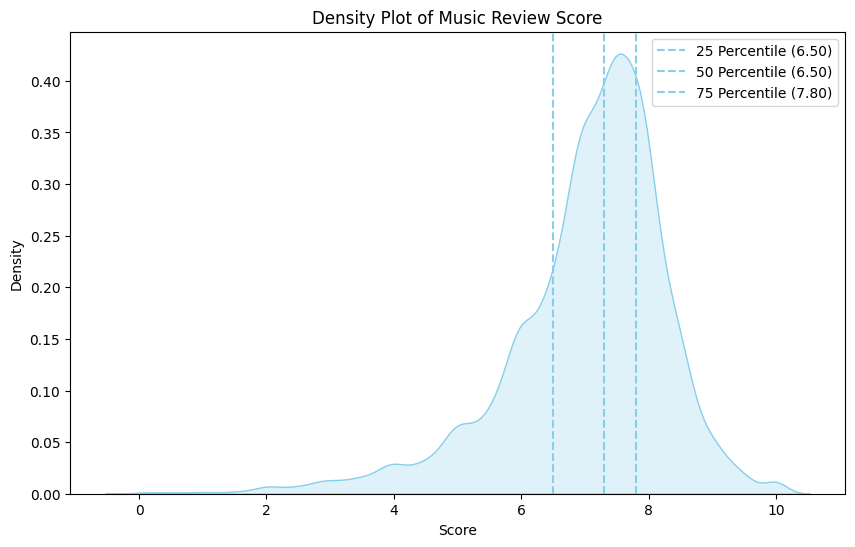

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Creating a density plot
percentile_a = music_reviews['score'].quantile(0.25)
percentile_aa = music_reviews['score'].quantile(0.50)
percentile_b = music_reviews['score'].quantile(0.75)
plt.figure(figsize=(10, 6))
sns.kdeplot(music_reviews['score'], shade=True, color='skyblue')
plt.title('Density Plot of Music Review Score')
plt.xlabel('Score')
plt.ylabel('Density')
plt.axvline(percentile_a, color='skyblue', linestyle='--', label=f'25 Percentile ({percentile_a:.2f})')
plt.axvline(percentile_aa, color='skyblue', linestyle='--', label=f'50 Percentile ({percentile_a:.2f})')
plt.axvline(percentile_b, color='skyblue', linestyle='--', label=f'75 Percentile ({percentile_b:.2f})')
# Adding a legend to the plot
plt.legend()
plt.show()

The distribution of music scores, as depicted by the kernel density plot, demonstrates a right-skewed distribution, signifying a concentration of higher scores within the corpus and a relative scarcity of lower scores. The delineation at the 25th (6.50) and 75th (7.80) percentiles illustrates that a quarter of the music scores fall below 6.50, while another quarter exceed 7.80, with the interquartile range embracing the median scores. This skewness towards higher scores might suggest a tendency for more favorable evaluations within this particular set of music reviews, or potentially, a positive bias in the selection of music albums that are reviewed.

# Code for Text Cleaning using Regular Expression

In [8]:
import re
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer



def clean_text(text):
    """
    A function to clean text data.

    Parameters:
    text (str): The text to clean.

    Returns:
    str: The cleaned text.
    """
    # Remove HTML tags using BeautifulSoup
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove non-letters
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Convert to lowercase
    text = text.lower()


    return text

music_reviews['review'] = music_reviews['review'].map(clean_text)

## Code for TF-IDF

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
import numpy as np
import string
from spacy.lang.en.stop_words import STOP_WORDS
import spacy

# stopwords
stop_words = STOP_WORDS

# Load English tokenizer. We don't need the parser or named entity recognition for this task, so we can leave them out.
nlp = spacy.load('en_core_web_sm', exclude=["parser", "ner"])

def tokenize_docs(doc):
  tokens = [tok.lemma_.lower() for tok in doc if not tok.is_punct and not tok.is_space]
  return [tok for tok in tokens if tok not in stop_words]

# User tfidf vectorizer from sklearn
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_docs, token_pattern=None, lowercase=False, sublinear_tf=True,min_df=5)

This study uses TF-IDF vectorizer from the library "sklearn" and uses library "spacy" to get the lemma form of each word.

# Code for Ridge regression

In [10]:

from sklearn.metrics import mean_squared_error, r2_score

seed = 42 # random seed
regression = Ridge()
X = music_reviews['review'] # the features we want to analyze
ylabels = music_reviews['score']

# the labels, or answers, we want to test against
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state = seed)
# When we are doing a multistep process in sklearn, it's best to set it up as a pipeline
X_train = list(nlp.pipe(X_train))
X_test = list(nlp.pipe(X_test))

pipe = Pipeline([('vectorizer', tfidf_vectorizer),
                 ('regression', regression)])

pipe.fit(X_train, y_train)


# Predicting the scores on the test set
y_pred = pipe.predict(X_test)

# Evaluating the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculating R-squared
r_squared = r2_score(y_test, y_pred)
absolute_errors = np.abs(y_test - y_pred)  # Absolute errors
weighted_errors = absolute_errors * y_test  # Weighted errors
total_actual = np.sum(y_test)  # Total actual scores
wmape = np.sum(weighted_errors) / total_actual if total_actual != 0 else np.nan  # wMAPE calculation


print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r_squared}")
print(f"wMAPE: {wmape:.2%}")

Mean Squared Error: 0.9237453173551343
Root Mean Squared Error: 0.961116703296293
R-squared: 0.46003260437279114
wMAPE: 64.74%


# Code for feature importance

In [11]:
# After fitting the Ridge model within a pipeline
coefs = pipe.named_steps['regression'].coef_

# Assuming the feature names can be retrieved from the vectorizer
feature_names = pipe.named_steps['vectorizer'].get_feature_names_out()

# Create a series to display feature names and their corresponding coefficients
import pandas as pd

feature_importance = pd.Series(coefs, index=feature_names)

# Display the features with the largest absolute values of coefficients, which have more influence on the model's predictions
print(feature_importance.abs().nlargest(10))


reissue          4.313516
bad              4.255013
unfortunately    4.171476
problem          3.853541
attempt          3.187671
generic          3.013620
decent           2.825595
lack             2.688768
awful            2.611786
fail             2.603149
dtype: float64


## Code for Distribution of POS tags


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


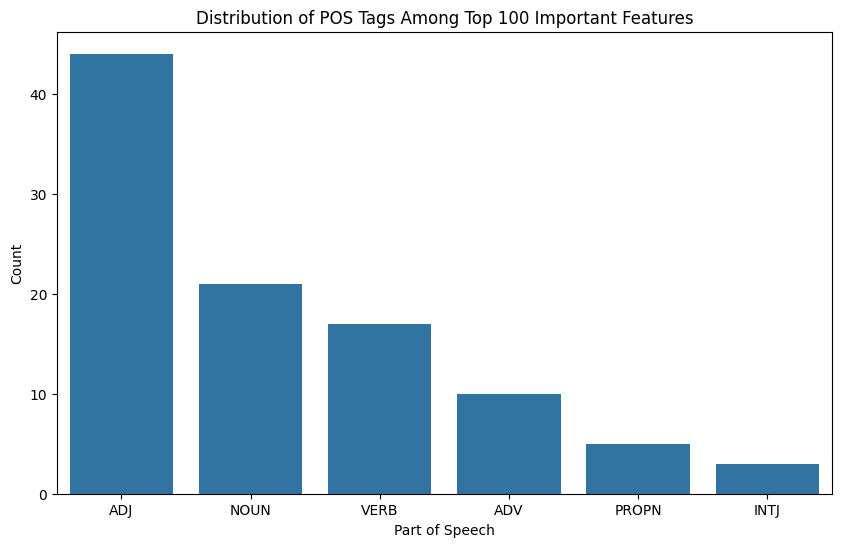

In [12]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Assuming you already have a fitted pipeline 'pipe' with a regression model and a vectorizer
coefs = pipe.named_steps['regression'].coef_
feature_names = pipe.named_steps['vectorizer'].get_feature_names_out()

# Create a series to display feature names and their corresponding coefficients
feature_importance = pd.Series(coefs, index=feature_names)

# Find the top 10000 features with the largest absolute values of coefficients
top_features = feature_importance.abs().nlargest(100)

# Process each feature with spaCy to get their POS tags
pos_tags = {feature: nlp(feature)[0].pos_ for feature in top_features.index}

# Create a DataFrame to display features, their importance, and POS tags
top_features_df = pd.DataFrame({
    "Feature": top_features.index,
    "Importance": top_features.values,
    "POS": [pos_tags[feature] for feature in top_features.index]
})

# Plotting the distribution of POS tags
plt.figure(figsize=(10, 6))
sns.countplot(data=top_features_df, x='POS', order=top_features_df['POS'].value_counts().index)
plt.title('Distribution of POS Tags Among Top 100 Important Features')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()


## Code for Residual Plot

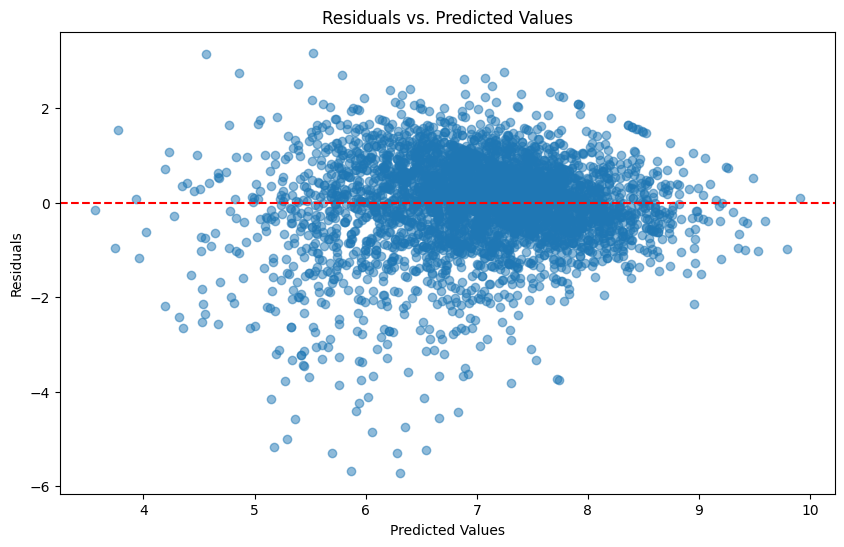

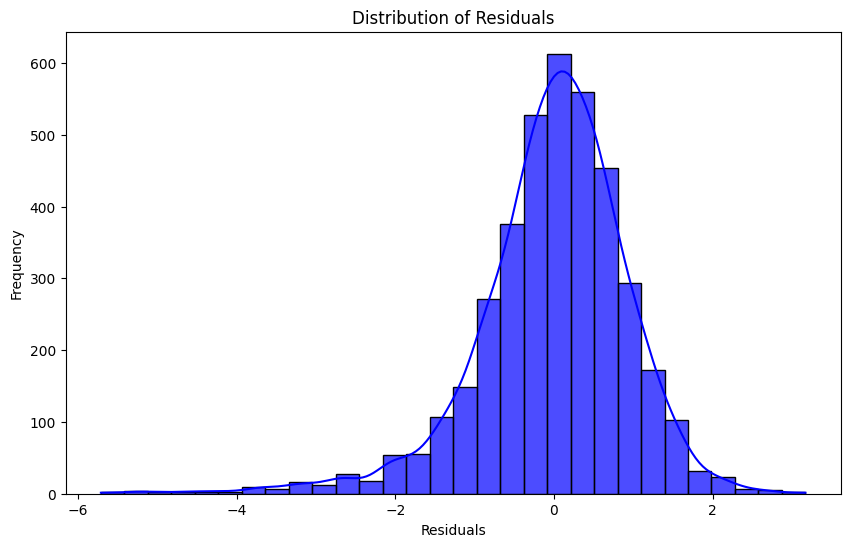

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming y_test and y_pred are the actual and predicted values from your regression model

# Calculate residuals
residuals = y_test - y_pred

# Plotting the Residuals vs. Predicted values (Residual Plot)
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Plotting the distribution of residuals to check for normality (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()